In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
smiles = pd.read_excel("datasets/Informer.xlsx", sheet_name="smiles", header=None)
[x[0] for x in smiles.values.tolist()]

['O=C1NC2=CC(Br)=CC3=C2N(C(CC(OC)=O)CC3)C1=O',
 'O=C(N(C)C1)C2=CC(Br)=CC=C2N3C1=C(C(OCC)=O)N=C3',
 'BrC1=CC=C(OC2=C(C3=CC=C(S(C)(=O)=O)C=C3)C(C)(C)OC2=O)N=C1',
 'BrC1=CC=C(F)C2=C1CN(C(O[C@H]3CN(C(OC(C)(C)C)=O)[C@H](C(OC)=O)C3)=O)C2',
 'BrC1=CC(C(C([C@H]2N(C(OCC3=CC=CC=C3)=O)CCC2)=O)=CN4)=C4C=C1',
 'BrC(C=N1)=CC2=C1/C(C3=CC=C(Cl)C=C3CC2)=C4CCN(C(OCC)=O)CC\\4',
 'ClC(C=C1)=CC=C1CN2C3=C(Br)C=C(F)C=C3C4C2[C@@H](CC(O)=O)CC4',
 'O=C(O[C@H]1CN(C(OCC2=CC=CC=C2)=O)[C@H](C(OC)=O)C1)N3CC4=CC=CC=C4C3',
 'BrC1=C(OC2CCN(C3=NOC(C4=NN(CC(O)=O)N=N4)=C3)CC2)C=C(F)C=C1',
 'OC1=C(C(NCC2=CC=C(F)C=C2)=O)N=C(Br)C3=CC=CN=C31',
 'CC1=CC(C#N)=CC(C)=C1OC2=NC(NC3=CC=C(C#N)C=C3)=NC(N)=C2Br',
 'O=C1C2C(N=C(N[C@@H]3CCC[C@H]3O)N2CC4=CC=C(OC)C(Br)=C4)N(CCO)C(N1CC)=O',
 'BrC1=CSC([C@]2(C)CC(N(C)/C(N2)=N\\C(OC(C)(C)C)=O)=O)=C1',
 'O=C1O[C@@H](CN2C=CN=N2)CN1C3=CC(F)=C(I)C=C3',
 'CCCC(N(CC1=CC=C(C2=C(S(NC(C)(C)C)(=O)=O)C=CC=C2)C=C1)C3=O)=NC4=C3C=C(I)C=C4',
 'CC(NC(C)=O)(C)[C@H](CC12CCN(C(OC(C)(C)C)=O)CC2)C3=C1C=CC=C3',
 '

In [32]:
desc_df = pd.read_excel("datasets/Informer.xlsx", sheet_name="descriptors", usecols=[0,1,2,3,4])
desc_df

,Ered (3*->2),(2 -> 3),Imax,Ni:Ir,Amine ratio
0,1.21,1.37,380,250,1.5
1,1.21,1.37,380,100,1.5
2,1.21,1.37,380,10,1.5
3,1.21,1.37,380,1,1.5
4,1.21,1.37,380,250,3.0
...,...,...,...,...,...
75,2.30,1.27,325,1,1.5
76,2.30,1.27,325,250,3.0
77,2.30,1.27,325,100,3.0
78,2.30,1.27,325,10,3.0


In [30]:
informer_df = pd.read_excel("datasets/Informer.xlsx").iloc[:80,:]

print(informer_df.shape)
informer_df["Catalyst"] = np.repeat(np.arange(1,11), 8)
informer_df["Ni_Ir_ratio"] = np.tile(np.array([250,100,10,1]), 20)
informer_df["Amine_ratio"] = np.tile(np.array([1.5,1.5,1.5,1.5,3,3,3,3]),10)
informer_df = informer_df.pivot_table(index=["Catalyst", "Ni_Ir_ratio", "Amine_ratio"])

# Dropping compounds where all yields are below 20%
cols_to_erase = []
for col in informer_df.columns :
    if np.all(informer_df.loc[:,col].to_numpy() < 20) :
        cols_to_erase.append(col)

print(cols_to_erase)

informer_df = informer_df.loc[:, [x for x in range(1,19) if x not in cols_to_erase]]
informer_df # --> 11 substrates
# 

(80, 18)
[1, 7, 9, 10, 16, 17, 18]


2   3   4   5   6   8  11  12  13  14   15
Catalyst Ni_Ir_ratio Amine_ratio                                             
1        1           1.5          37   0   4   0  15  22   5   2   4  26   16
                     3.0          42   0   2   1  28   7   0   3   0  23   22
         10          1.5          60   2  34   6  30  52   0  52  29  68   29
                     3.0          70   1  36  15  60  26   0  72  45  76   29
         100         1.5          55  19  31   9   2  62   1  49  30  68   47
...                               ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...
10       10          3.0           1  17   0   1   0   2   0   0   0  28   68
         100         1.5           0  16   0   0   0   0   0   0   0  23   49
                     3.0           0  24   0   0   0   2   0   0   0  43  100
         250         1.5           0  19   0   0   0   0   0   0   0  18   70
                     3.0           0  22   0   0   0   7   0   0   0  32  100

[80 rows x 11 columns]

<Axes: >

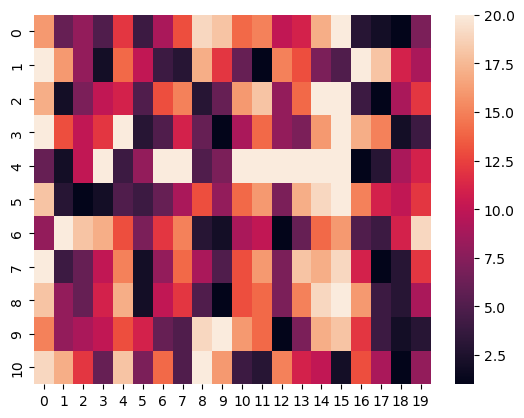

In [50]:
from dataset_utils import *
sub_df1 = informer_df.query("Amine_ratio == 1.5").iloc[:20,:]
sns.heatmap(yield_to_ranking(sub_df1.to_numpy().T))

In [51]:
np.argpartition(np.array([-4,-2,-1,-3]),2)

array([0, 3, 1, 2])

1   2   3   4   5   6  7   8  9  10  11  12  \
Catalyst Ni_Ir_ratio Amine_ratio                                                
1        1           1.5          0  37   0   4   0  15  0  22  0   0   5   2   
                     3.0          0  42   0   2   1  28  0   7  0   3   0   3   
         10          1.5          0  60   2  34   6  30  0  52  0   1   0  52   
                     3.0          0  70   1  36  15  60  0  26  0   2   0  72   
         100         1.5          0  55  19  31   9   2  0  62  0   1   1  49   
...                              ..  ..  ..  ..  ..  .. ..  .. ..  ..  ..  ..   
12       10          3.0          0   0  20   0   0   0  0   2  0   3   0   0   
         100         1.5          0   0  18   0   0   0  0   0  0   2   0   0   
                     3.0          0   0  20   0   0   0  0   3  0   3   0   0   
         250         1.5          0   0  19   0   0   0  0   0  0   1   0   0   
                     3.0          0   0  19   0   0   0  0   2  0   3   0   0   

                                  13  14   15  16  17  18  
Catalyst Ni_Ir_ratio Amine_ratio                           
1        1           1.5           4  26   16   0   0   0  
                     3.0           0  23   22   0   9   0  
         10          1.5          29  68   29   0   2   2  
                     3.0          45  76   29   0   5   1  
         100         1.5          30  68   47   0   0   1  
...                               ..  ..  ...  ..  ..  ..  
12       10          3.0           0   3   66   0   0   0  
         100         1.5           0   0   56   0   0   0  
                     3.0           0   6  100   0   0   0  
         250         1.5           0   5   74   0   0   0  
                     3.0           0   5  100   0   0   0  

[96 rows x 18 columns]

In [3]:
sub_dfs = []
for i in range(10) :
    

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0,61,31,26,8,0,0,61,0,1,1,24,24,66,57,0,0,2
1,0,55,19,31,9,2,0,62,0,1,1,49,30,68,47,0,0,1
2,0,60,2,34,6,30,0,52,0,1,0,52,29,68,29,0,2,2
3,0,37,0,4,0,15,0,22,0,0,5,2,4,26,16,0,0,0
4,0,60,30,24,16,2,0,30,0,2,1,16,36,90,80,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0,0,6,0,0,0,0,0,0,1,0,0,0,13,37,0,0,0
76,0,0,22,0,0,0,0,7,0,2,0,0,0,32,100,0,0,0
77,0,0,24,0,0,0,0,2,0,2,0,0,0,43,100,0,0,0
78,0,1,17,0,1,0,0,2,0,3,0,0,0,28,68,0,0,0
